In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [ ]:
""" READ ME
Content:
first cell holds the functions
in the next cell the functions are run,
after that results are printed
after that some remarks are made regarding the data
"""

In [49]:
class DataAnalyzer:
    def __init__(self):
        base_folder = 'wine+quality'
        whitewine_data = pd.read_csv(f'{base_folder}/winequality-white.csv', sep=';') 
        redwine_data = pd.read_csv(f'{base_folder}/winequality-red.csv', sep=';') 
        self.description_file = f'{base_folder}/winequality.names'
        self.dataset = whitewine_data


    def read_file(self):
        file_path = self.description_file

        # Open the file
        with open(file_path, 'r') as file:
            # Read lines
            lines = file.readlines()

        # Displaying the content
        for line in lines:
            print(line.strip())  
    
    def show_boxplots(self):
        fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
        index = 0
        axs = axs.flatten()
        for k,v in self.dataset.items():
            sns.boxplot(y=k, data=self.dataset, ax=axs[index])
            index += 1
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    def show_outlier_percs(self):
        for k, v in self.dataset.items():
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(self.dataset)[0]
            print("Column %s outliers = %.2f%%" % (k, perc))

    def remove_outliers(self):
        self.dataset = self.dataset[~((self.dataset['quality'] > 7.0) | (self.dataset['quality'] < 4.0))]
        self.dataset = self.dataset[~((self.dataset['density'] > 1.01) | (self.dataset['density'] < 0.98))]
        self.dataset = self.dataset[~((self.dataset['pH'] > 3.59) | (self.dataset['pH'] < 2.78))]
        self.dataset = self.dataset[~((self.dataset['chlorides'] > 0.08))]
        self.dataset = self.dataset[~((self.dataset['volatile acidity'] > 0.5))]
        self.dataset = self.dataset[~((self.dataset['total sulfur dioxide'] > 260.0))]
        self.dataset = self.dataset[~((self.dataset['residual sugar'] > 21.0))]
        self.dataset = self.dataset[~((self.dataset['fixed acidity'] > 9.1))]
        self.dataset = self.dataset[~((self.dataset['citric acid'] > 0.65))]
        return self.dataset

    def normalize_df_by_max(self):
        normalized_df = self.dataset.copy()
        for column in self.dataset.columns[:-1]:  # Exclude the last column
            max_abs_value = abs(self.dataset[column]).max()
            normalized_df[column] = self.dataset[column] / max_abs_value

        self.dataset = normalized_df
        return(self.dataset)

    def normalize_df_by_mean(self):
        sc = StandardScaler()
        self.X_train = sc.fit_transform(self.X_train)
        self.X_test = sc.transform(self.X_test)
        return(self.X_train, self.X_test)
    
    def show_histplots(self):
        fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
        index = 0
        axs = axs.flatten()
        for k,v in self.dataset.items():
            sns.histplot(v, ax=axs[index])
            index += 1
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    def show_heat_map(self):
        plt.figure(figsize=(20, 10))
        sns.heatmap(self.dataset.corr().abs(),  annot=True)

    def plot_variations(self):
        # Let's scale the columns before plotting them against MEDV
        min_max_scaler = preprocessing.MinMaxScaler()
        # column_sels = ['alcohol', 'density', 'volatile acidity', 'total sulfur dioxide', 'fixed acidity', 'chlorides', 'residual sugar', 'pH']
        column_sels = self.dataset.columns
        x = self.dataset.loc[:,column_sels]
        y = self.dataset['quality']
        x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
        fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
        index = 0
        axs = axs.flatten()
        for i, k in enumerate(column_sels):
            sns.regplot(y=y, x=x[k], ax=axs[i])
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    def get_x_and_Y(self):
        self.X = self.dataset.iloc[:, list(range(11))].values
        self.y = self.dataset.iloc[:, -1].values
        return (self.X, self.y)

    def get_train_test_split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = 0.20, random_state = 0)
        return (self.X_train, self.X_test, self.y_train, self.y_test)

    def perform_knn(self):
        classifier = KNeighborsClassifier(n_neighbors = 40, metric = 'minkowski', p = 2.7)
        classifier.fit(self.X_train, self.y_train)
        y_pred = classifier.predict(self.X_test)
        self.cm = confusion_matrix(self.y_test, y_pred)
        self.ac = accuracy_score(self.y_test,y_pred)
        return self.ac
    
    def perform_kfold_cv(self):
        classifier = KNeighborsClassifier(n_neighbors = 40, metric = 'minkowski', p = 2.7)
    
        cv_scores = cross_val_score(classifier, self.X_train, self.y_train, cv=5)  # Specify the number of folds (k) with cv parameter

        # Print the cross-validation scores
        return (cv_scores.mean(), cv_scores.max(), cv_scores)

class Master:
    def __init__(self):
        self.results = {}

    def organize_results(self):
        items = []
        for k, v in self.results.items():
            print(k, v)
            if isinstance(v, dict):
                for xk, xv in v.items():
                    new_x_key = xk
                    items.append((new_x_key, xv))
            else:
                new_key = k
                items.append((new_key, v))
        r_items = dict(items)
        df = pd.DataFrame({'method': list(r_items.keys()), 'result': list(r_items.values())})
        return df

    def run_raw(self):
        anlyzr = DataAnalyzer()
        anlyzr.get_x_and_Y()
        anlyzr.get_train_test_split()
        self.results["raw_run"] = anlyzr.perform_knn()

    def run_after_removing_outliers(self):
        anlyzr = DataAnalyzer()
        anlyzr.remove_outliers()
        anlyzr.get_x_and_Y()
        anlyzr.get_train_test_split()
        self.results["after_removing_outliers_run"] = anlyzr.perform_knn()

    def run_after_max_normalisation(self):
        anlyzr = DataAnalyzer()
        anlyzr.remove_outliers()
        anlyzr.normalize_df_by_max()
        anlyzr.get_x_and_Y()
        anlyzr.get_train_test_split()
        self.results["after_max_normalisation_run"] = anlyzr.perform_knn()

    def run_after_mean_normalisation(self):
        anlyzr = DataAnalyzer()
        anlyzr.remove_outliers()
        anlyzr.get_x_and_Y()
        anlyzr.get_train_test_split()
        anlyzr.normalize_df_by_mean()
        self.results["after_mean_normalisation_run"] = anlyzr.perform_knn()

    def run_with_kfold(self):
        anlyzr = DataAnalyzer()
        anlyzr.remove_outliers()
        anlyzr.get_x_and_Y()
        anlyzr.get_train_test_split()
        anlyzr.normalize_df_by_mean()
        (k_mean, k_max, k_scores) = anlyzr.perform_kfold_cv()
        self.results["after_k_fold_run"] = {
            "k_mean": k_mean,
            "k_max" : k_max,
            "k_scores": k_scores
        }

    def run(self):
        self.run_raw()
        self.run_after_removing_outliers()
        self.run_after_max_normalisation()
        self.run_after_mean_normalisation()
        self.run_with_kfold()
        return self.results

In [50]:
mstr = Master()
results = mstr.run()

In [51]:
results_df = mstr.organize_results()
display(results_df)

raw_run 0.40714285714285714
after_removing_outliers_run 0.5041617122473246
after_max_normalisation_run 0.5862068965517241
after_mean_normalisation_run 0.6016646848989299
after_k_fold_run {'k_mean': 0.5565087030354489, 'k_max': 0.5690936106983655, 'k_scores': array([0.56909361, 0.56166419, 0.55952381, 0.55654762, 0.53571429])}


,method,result
0,raw_run,0.407143
1,after_removing_outliers_run,0.504162
2,after_max_normalisation_run,0.586207
3,after_mean_normalisation_run,0.601665
4,k_mean,0.556509
5,k_max,0.569094
6,k_scores,"[0.5690936106983655, 0.5616641901931649, 0.559..."


In [ ]:
"""
Performing normalisation generally improved the results, doing kfold cv also improved results, but was not as good as simple normalisation and manual splitting
"""

In [47]:
anlyzr = DataAnalyzer()

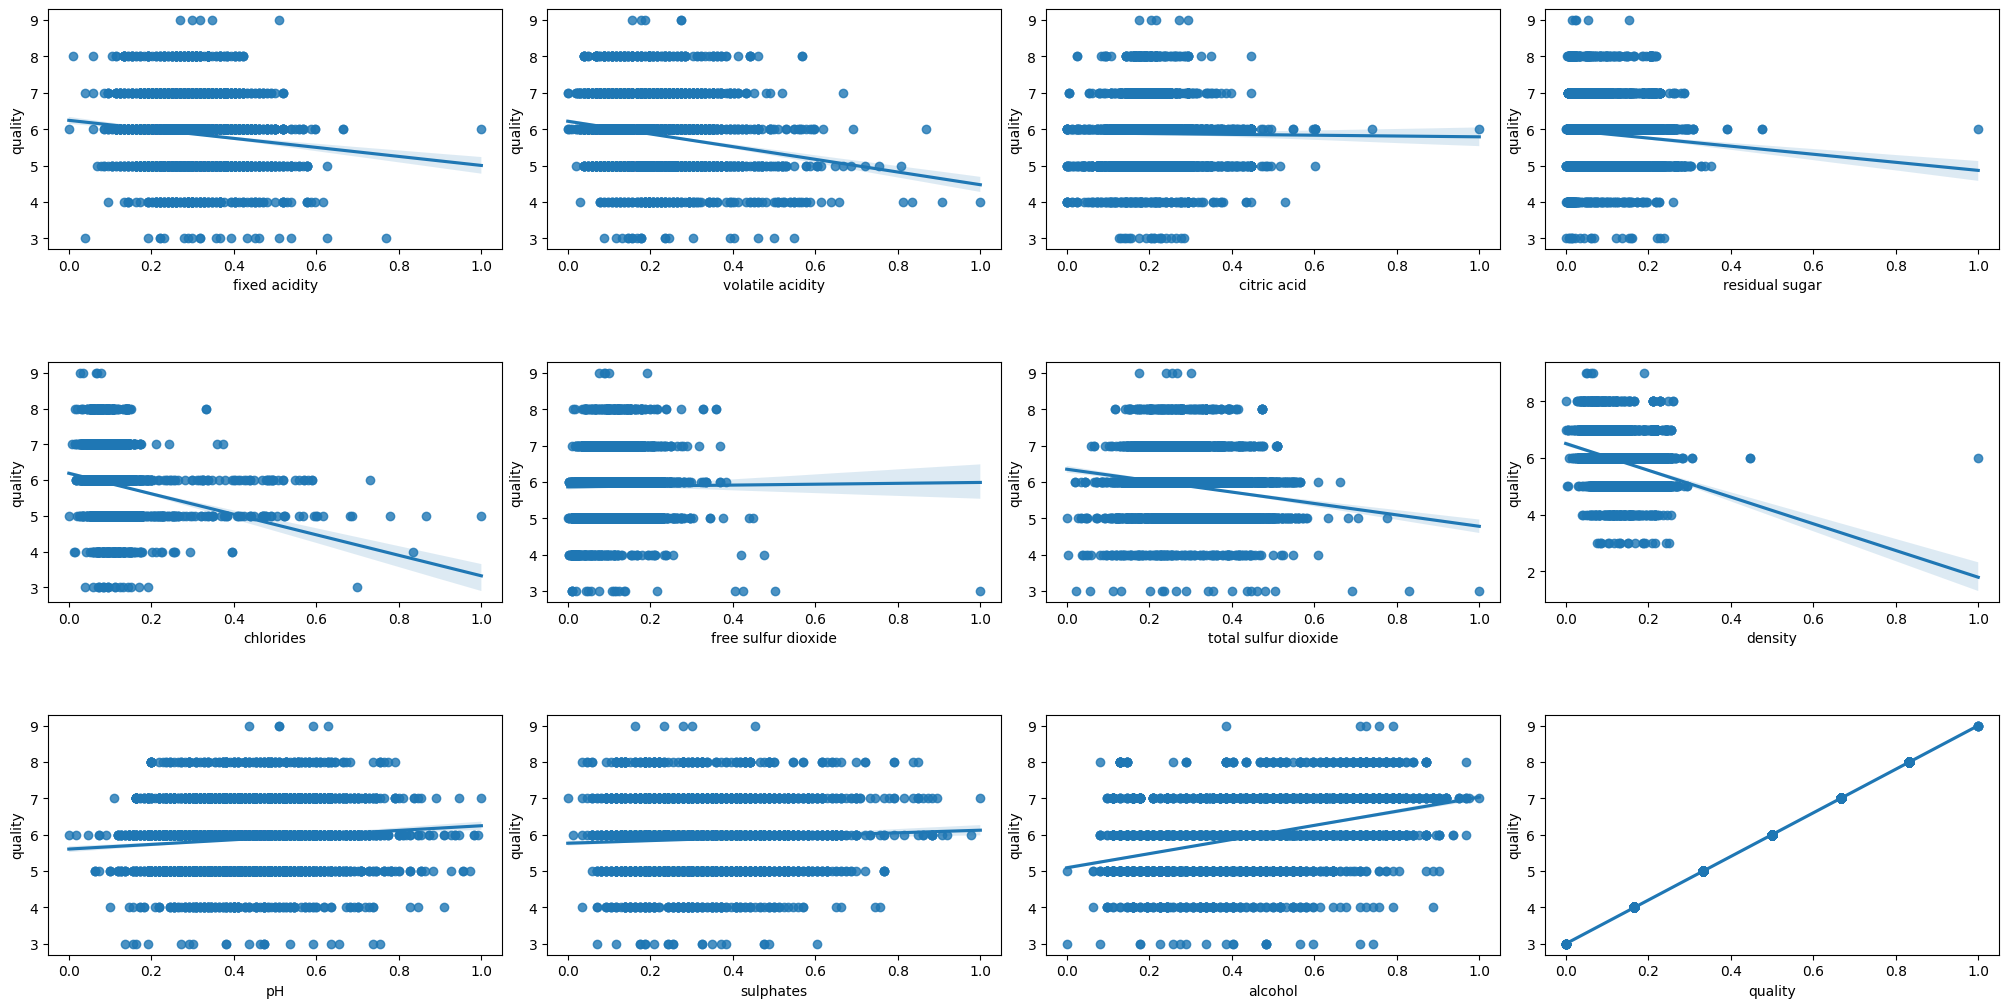

In [48]:
anlyzr.plot_variations()

In [ ]:
anlyzr.show_boxplots()

In [ ]:
anlyzr.show_outlier_percs()

In [ ]:
anlyzr.show_histplots()

In [ ]:
anlyzr.show_heat_map()